In [825]:
import numpy as np
import seaborn as sns
import sys
sys.path.insert(0, './src')

from trajectory import trajectory
from kf import KF
from matplotlib import pyplot as plt

sns.set()

In [826]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simulate CAM trajectory

In [827]:
ndat = 100
q = 0.5
dt = 1
r = 50

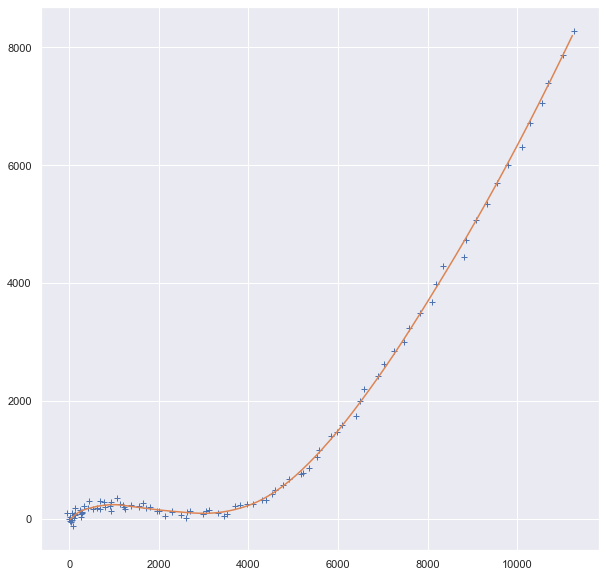

In [828]:
# Transition matrix
A = np.array([
    [1, 0, dt,  0, dt**2/2,       0],
    [0, 1, 0,  dt,       0, dt**2/2],
    [0, 0, 1,   0,      dt,       0],
    [0, 0, 0,   1,       0,      dt],
    [0, 0, 0,   0,       1,       0],
    [0, 0, 0,   0,       0,       1]
])

# Process noise
Q = q * np.array([
    [dt**5/20,        0, dt**4/8,       0, dt**3/6,       0],
    [       0, dt**5/20,       0, dt**4/8,       0, dt**3/6],
    [ dt**4/8,        0, dt**3/3,       0, dt**2/2,       0],
    [       0,  dt**4/8,       0, dt**3/3,       0, dt**2/2],
    [ dt**3/6,        0, dt**2/2,       0,      dt,       0],
    [       0,  dt**3/6,       0, dt**2/2,       0,      dt]
    
])

H = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0]])
R = r**2 * np.eye(2)
init_state = np.array([20, -15, 1, 1, 0.1, 0.1])

traj = trajectory(A, H, Q, R, init_state, random_state=563, n=ndat)

# Plot
plt.figure(figsize=(10, 10))
# plt.axis("equal")
plt.plot(traj.Y[0,:], traj.Y[1,:], "+")
plt.plot(traj.X[0,:], traj.X[1,:])
plt.show()

## Random Walk Model

In [829]:
A = np.array([[1, 0],
              [0, 1]])

Q = q * np.array([[dt, 0],
                  [0, dt]])

H = np.array([[1, 0],
              [0, 1]])

R = r**2 * np.eye(2)

In [830]:
kf = KF(A=A, B=None, H=H, R=R, Q=Q)

for yt in traj.Y.T:
    kf.predict()
    kf.update(yt)
    kf.log()
    
log_x = np.array(kf.log_x)

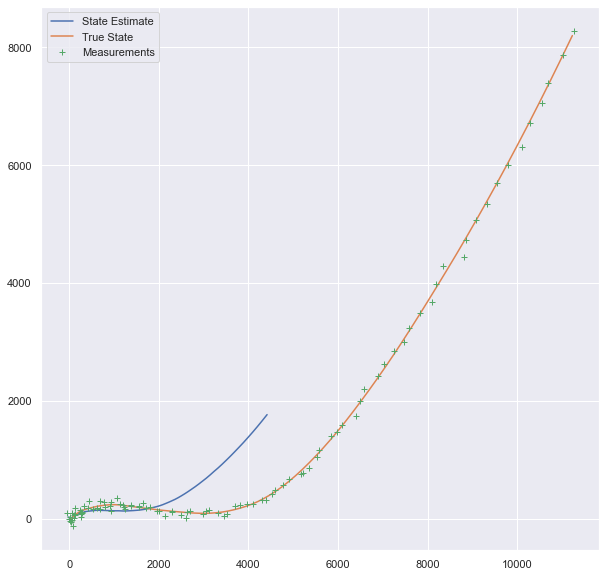

In [831]:
plt.figure(figsize=(10, 10))
plt.plot(log_x[:, 0], log_x[:, 1], label="State Estimate")
plt.plot(traj.X[0, :], traj.X[1, :], label="True State")
plt.plot(traj.Y[0, :], traj.Y[1, :], '+',label="Measurements")

plt.legend()
plt.show()

# Constant Velocity Model

In [832]:
A = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1,  0],
              [0, 0, 0,  1]])

Q = q * np.array([[dt**3/3, 0      , dt**2/2, 0      ],
                  [0,       dt**3/3, 0,       dt**2/2],
                  [dt**2/2, 0,       dt,      0      ],
                  [0,       dt**2/2, 0,       dt     ]])

H = np.array([[1., 0, 0, 0],
              [0., 1, 0, 0]])
R = r**2 * np.eye(2)

In [833]:
kf = KF(A=A, B=None, H=H, R=R, Q=Q)

for yt in traj.Y.T:
    kf.predict()
    kf.update(yt)
    kf.log()
    
log_x = np.array(kf.log_x)

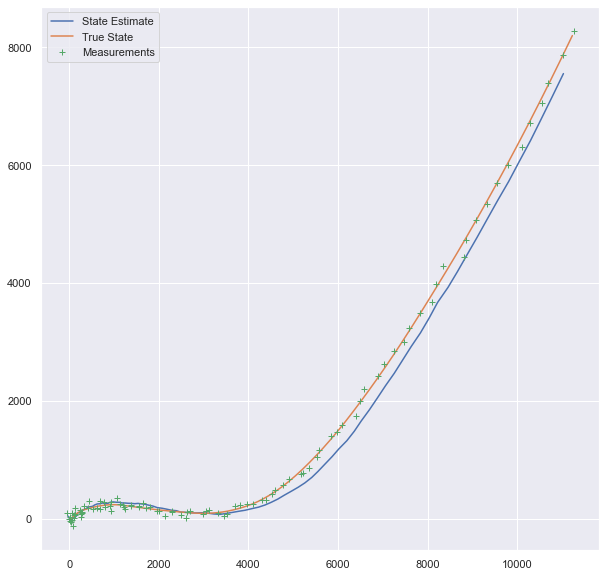

In [834]:
plt.figure(figsize=(10, 10))
plt.plot(log_x[:, 0], log_x[:, 1], label="State Estimate")
plt.plot(traj.X[0, :], traj.X[1, :], label="True State")
plt.plot(traj.Y[0, :], traj.Y[1, :], '+',label="Measurements")

plt.legend()
plt.show()

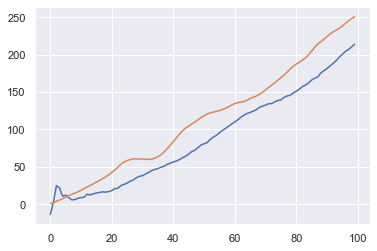

In [835]:
plt.plot(log_x[:, 2])
plt.plot(traj.X[2, :])

# Constant Acceleration Model

In [836]:
# Transition matrix
A = np.array([
    [1, 0, dt,  0, dt**2/2,       0],
    [0, 1, 0,  dt,       0, dt**2/2],
    [0, 0, 1,   0,      dt,       0],
    [0, 0, 0,   1,       0,      dt],
    [0, 0, 0,   0,       1,       0],
    [0, 0, 0,   0,       0,       1]
])

# Process noise
Q = q * np.array([
    [dt**5/20,        0, dt**4/8,       0, dt**3/6,       0],
    [       0, dt**5/20,       0, dt**4/8,       0, dt**3/6],
    [ dt**4/8,        0, dt**3/3,       0, dt**2/2,       0],
    [       0,  dt**4/8,       0, dt**3/3,       0, dt**2/2],
    [ dt**3/6,        0, dt**2/2,       0,      dt,       0],
    [       0,  dt**3/6,       0, dt**2/2,       0,      dt]
    
])

H = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0]])
R = r**2 * np.eye(2)
init_state = np.array([0, 0, 1, 1, 0.1, 0.1])

In [837]:
kf = KF(A=A, B=None, H=H, R=R, Q=Q)

for yt in traj.Y.T:
    kf.predict()
    kf.update(yt)
    kf.log()
    
log_x = np.array(kf.log_x)

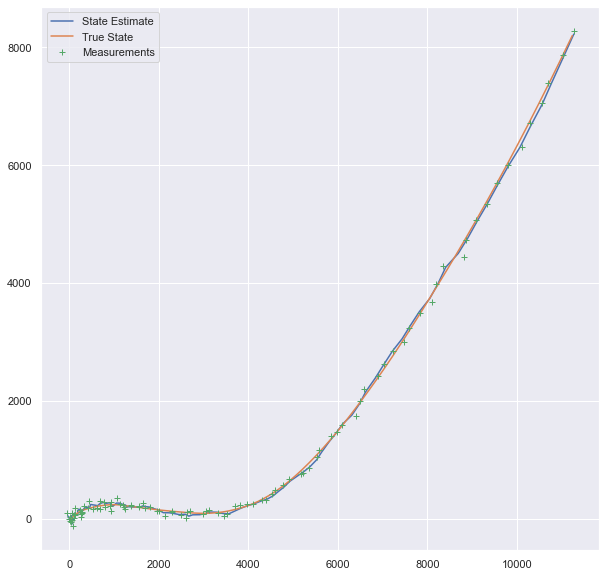

In [838]:
plt.figure(figsize=(10, 10))
plt.plot(log_x[:, 0], log_x[:, 1], label="State Estimate")
plt.plot(traj.X[0, :], traj.X[1, :], label="True State")
plt.plot(traj.Y[0, :], traj.Y[1, :], '+',label="Measurements")

plt.legend()
plt.show()

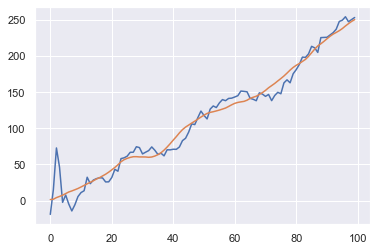

In [839]:
plt.plot(log_x[:, 2])
plt.plot(traj.X[2, :])